Regression Coefficients:
 [[ 1.04751754e+02]
 [ 8.50660466e-02]
 [-1.49240557e+00]
 [-6.26211308e-02]
 [ 6.24373258e-02]
 [-7.57250799e-01]
 [ 4.93704476e-03]
 [-1.40267651e-03]
 [-1.03909624e+02]
 [ 4.98755772e-01]
 [ 7.21744427e-01]
 [ 2.22669742e-01]
 [-3.61331693e-01]]

RMSE: 0.7324
R² Score: 0.2965


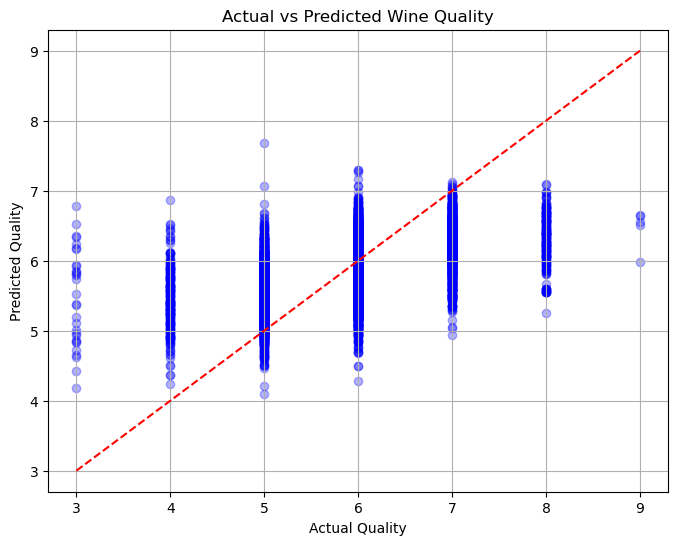

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import qr, solve
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Datasets/combined_winequality.csv")

# Feature matrix (X) and target vector (y)
X = df.drop(columns=['quality'])  # All features except target
y = df['quality'].values.reshape(-1, 1)

# Add intercept (bias) column to X
X = np.hstack([np.ones((X.shape[0], 1)), X.values])  # shape: (n_samples, n_features + 1)

# QR Decomposition
Q, R = qr(X)

# Solve Rβ = Qᵗy to get coefficients β
QTy = Q.T @ y
beta = solve(R, QTy)

# Predict
y_pred = X @ beta

# Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("Regression Coefficients:\n", beta)
print(f"\nRMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.grid(True)
plt.show()


In [ ]:
# Basic dataset info
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (6497, 13)

Column Names:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

Data Types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates           

In [ ]:
# Descriptive statistics for all numeric columns
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


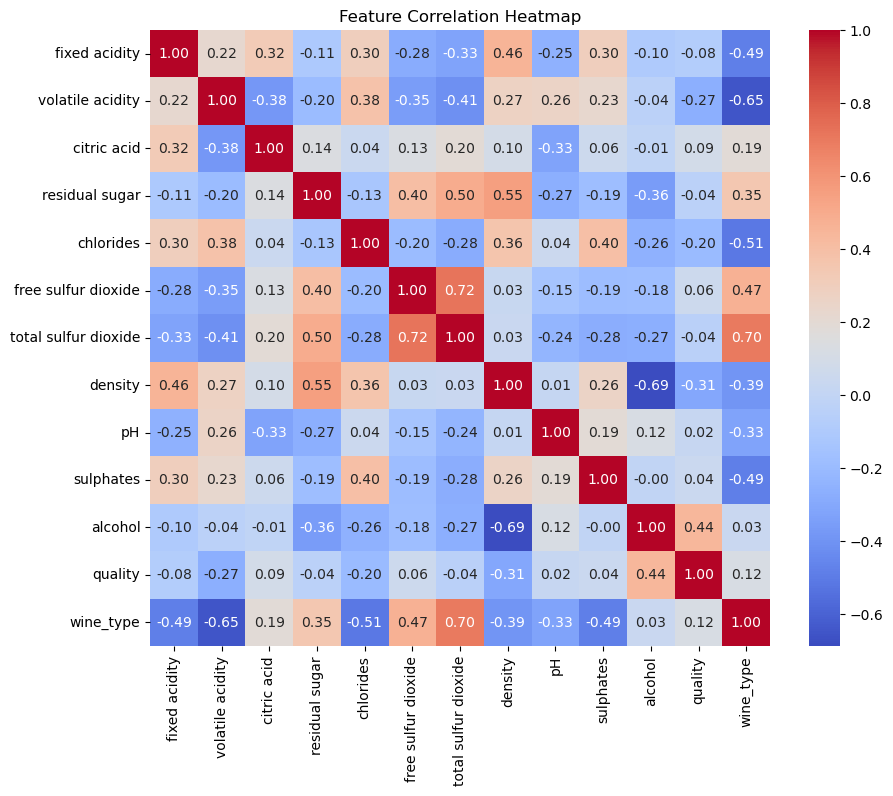

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

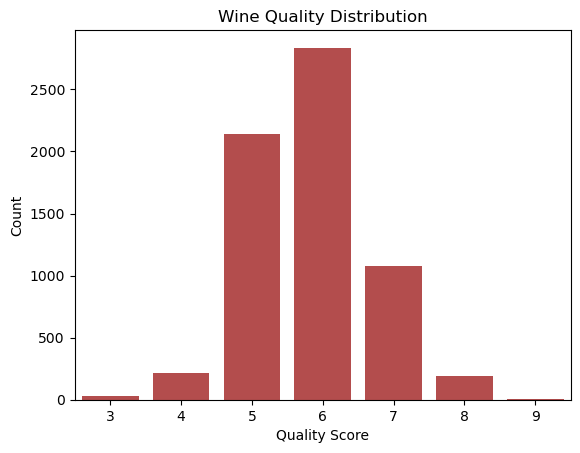

In [ ]:
sns.countplot(x="quality", data=df, color="red", saturation=0.4)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10952\1691193242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data= df, palette="Set2")


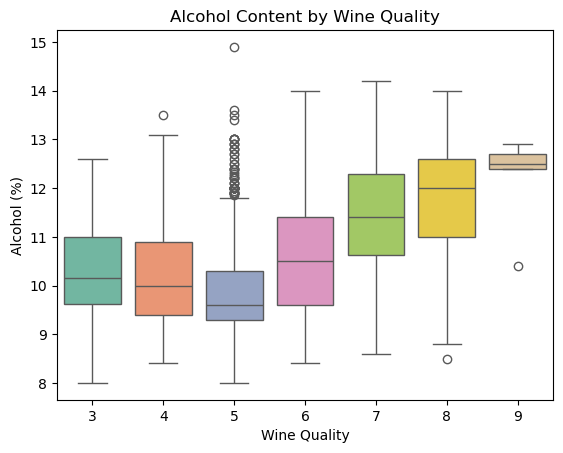

In [ ]:
sns.boxplot(x="quality", y="alcohol", data= df, palette="Set2")
plt.title("Alcohol Content by Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol (%)")
plt.show()


In [ ]:
# Feature matrix (X) and target vector (y)
X = df.drop(columns=['quality'])  # All features except target
y = df['quality'].values.reshape(-1, 1)

# Add intercept (bias) column to X
X = np.hstack([np.ones((X.shape[0], 1)), X.values])

# QR Decomposition
Q, R = qr(X)

# Solve Rβ = Qᵗy to get coefficients β
QTy = Q.T @ y
beta = solve(R, QTy)

# Predict
y_pred = X @ beta

# Print the coefficients
print("Regression Coefficients:\n", beta)

Regression Coefficients:
 [[ 1.04751754e+02]
 [ 8.50660466e-02]
 [-1.49240557e+00]
 [-6.26211308e-02]
 [ 6.24373258e-02]
 [-7.57250799e-01]
 [ 4.93704476e-03]
 [-1.40267651e-03]
 [-1.03909624e+02]
 [ 4.98755772e-01]
 [ 7.21744427e-01]
 [ 2.22669742e-01]
 [-3.61331693e-01]]


In [ ]:
try:
    df = pd.read_csv("Datasets/combined_winequality.csv")
except FileNotFoundError:
    print("Error: The file 'combined_winequality.csv' was not found.")
    df = None

if df is not None:
    # Separate features (X) and target (y)
    X = df.drop(columns=['quality'])
    y = df['quality']

    # Display mean and std deviation of original features
    print("Original Features:")
    print("Mean:\n", X.mean())
    print("\nStandard Deviation:\n", X.std())

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the data
    X_scaled = scaler.fit_transform(X)

    # Create a DataFrame for scaled features to easily view mean and std
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Display mean and std deviation of scaled features
    print("\nScaled Features:")
    print("Mean:\n", X_scaled_df.mean())
    print("\nStandard Deviation:\n", X_scaled_df.std())

Original Features:
Mean:
 fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
wine_type                 0.753886
dtype: float64

Standard Deviation:
 fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
wine_type                0.430779
dtype: float64

Scaled Features:
Mean:
 fixed acidity          -3.849639e-16
volatile acidity        1.049902

In [ ]:
# Load the dataset
try:
    df = pd.read_csv("Datasets/combined_winequality.csv")
except FileNotFoundError:
    print("Error: The file 'combined_winequality.csv' was not found.")
    df = None

if df is not None:
    # Feature matrix (X) and target vector (y)
    X = df.drop(columns=['quality'])
    y = df['quality'].values.reshape(-1, 1)

    # Add intercept (bias) column to X
    X = np.hstack([np.ones((X.shape[0], 1)), X.values])

    # QR Decomposition
    Q, R = qr(X)

    # Solve Rβ = Qᵀy to get coefficients β
    QTy = Q.T @ y
    beta = solve(R, QTy)

    # Predict
    y_pred = X @ beta

    # Create a DataFrame to display the actual and predicted values side-by-side
    results_df = pd.DataFrame({'Actual Quality': y.flatten(), 'Predicted Quality': y_pred.flatten()})

    # Print the first few results
    print("First 10 Actual vs. Predicted Quality Scores:")
    print(results_df.head(10))

First 10 Actual vs. Predicted Quality Scores:
   Actual Quality  Predicted Quality
0               5           4.971138
1               5           4.911381
2               5           5.030133
3               6           5.788198
4               5           4.971138
5               5           5.026806
6               5           5.098966
7               7           5.381163
8               7           5.262666
9               5           5.794200


In [ ]:
# Load the dataset
df = pd.read_csv("Datasets/combined_winequality.csv")

# Feature matrix (X) and target vector (y)
X = df.drop(columns=['quality'])
y = df['quality'].values.reshape(-1, 1)

# Add intercept (bias) column to X
X = np.hstack([np.ones((X.shape[0], 1)), X.values])

# QR Decomposition
Q, R = qr(X)

# Solve Rβ = Qᵗy to get coefficients β
QTy = Q.T @ y
beta = solve(R, QTy)

# Predict
y_pred = X @ beta

# Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.7324
R² Score: 0.2965


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


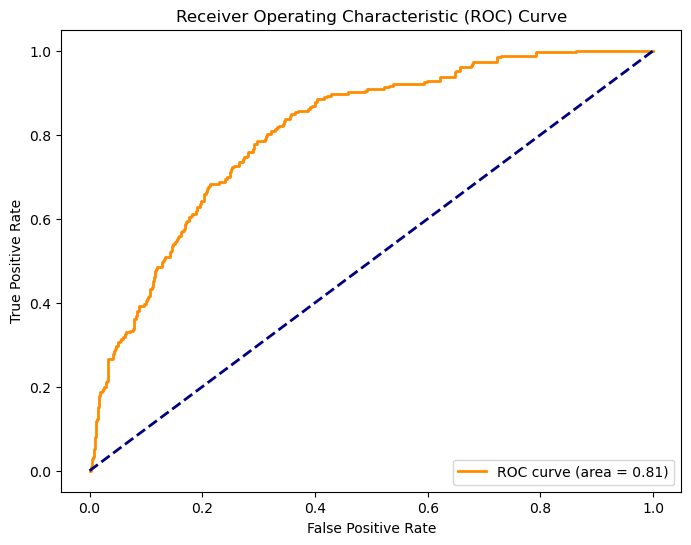

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("Datasets/combined_winequality.csv")

# Define a threshold to create a binary target variable
# For example, let's consider a quality score of 7 or higher as "good" (1) and lower as "not good" (0)
df['is_good'] = (df['quality'] >= 7).astype(int)

# Select features and the new binary target
X = df.drop(columns=['quality', 'is_good'])
y = df['is_good']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a classification model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()